In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\Sharad Naidu\\Documents\\Ritesh\\Python project\\Heart disease Prediction using python\\dataset.csv")

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
#Dropping not required columns.

In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
df1=df.drop(['education'],axis=1)

In [7]:
df1

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [8]:
df1.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
#changing column name from male to gender
df2=df1.rename(columns={'male':'Gender'})

In [10]:
#Checking for missing values.

In [11]:
df2.isnull().sum()

Gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
#as very few or around 10-12% pf rowsa of entire dataset contain null, so we can remove those.
df3=df2.dropna()

In [13]:
df3.isnull().sum()

Gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [14]:
#Exploratory Analysis

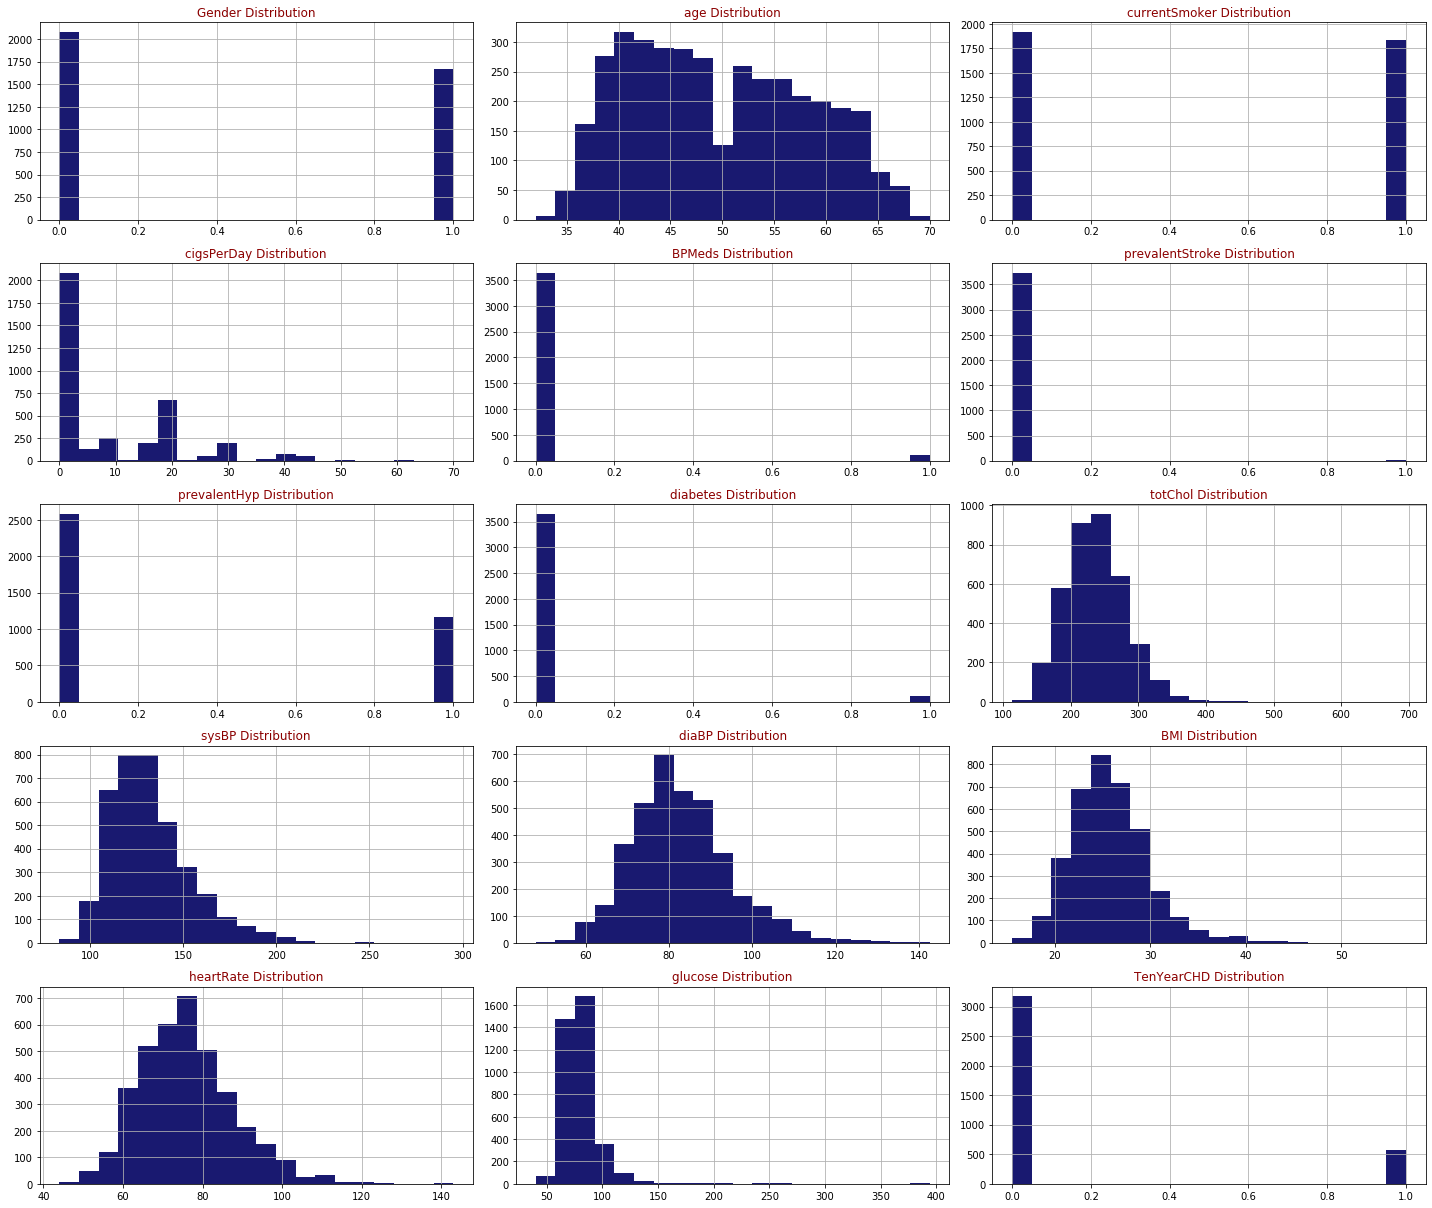

In [15]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df3,df3.columns,6,3)

In [16]:
#counting no. of patients with heart disease and not 
df3.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

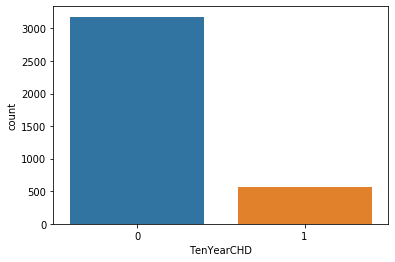

In [17]:
sn.countplot(x='TenYearCHD',data=df3)

In [18]:
df3.describe()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [19]:
#adding constant
from statsmodels.tools import add_constant
df3_constant=add_constant(df3)
df3_constant

,const,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1.0,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,1.0,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1.0,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [20]:
df3.shape

(3751, 15)

In [21]:
st.chisqprob=lambda chisq,df:st.chi2.sf(chisq,df3)
cols=df3.columns[:-1]
model=sm.Logit(df3.TenYearCHD,df3_constant[cols])
result=model.fit()
result.summary()

#Examine below resulted P-Values which indicate which Independant variables make sense in predicting Target variable. 

Optimization terminated successfully.
         Current function value: 0.400050
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3737
Method:                           MLE   Df Model:                           13
Date:                Sun, 03 May 2020   Pseudo R-squ.:                 0.06313
Time:                        22:23:18   Log-Likelihood:                -1500.6
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 4.723e-36
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Gender              0.4089      0.103      3.976      0.000       0.207       0.610
age                 0.0286      0.006      4.989      0.000       0.017       0.040
currentSmoker      -0.2367      0.150     -1.574      0.115      -0.531       0.058
cigsPerDay          0.0214      0.006      3.528      0.000       0.010       0.033
BPMeds              0.3241      0.227      1.426      0.154      -0.121       0.770
prevalentStroke     0.7838      0.483      1.623      0.105      -0.163       1.731
prevalentHyp        0.9718      0.122      7.964      0.000       0.733       1.211
diabetes            0.7825      0.291      2.686      0.007       0.212       1.354
totChol            -0.0015      0.001     -1.386      0.166      -0.004       0.001
sysBP               0.0133      0.004      3.548      0.000       0.006       0.021
diaBP              -0.0301      0.006     -5.027      0.000      -0.042      -0.018
BMI                -0.0465      0.012     -3.804      0.000      -0.070      -0.023
heartRate          -0.0228      0.004     -5.817      0.000      -0.031      -0.015
glucose             0.0019      0.002      0.899      0.369      -0.002       0.006
===================================================================================
"""

In [22]:
#Feature selection ,backward elimination p-value approach.

In [23]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df3_constant,df3.TenYearCHD,cols)

In [24]:
result.summary()
#it shows which are the variables with P-values less than 0.05.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            8
Date:                Sun, 03 May 2020   Pseudo R-squ.:                 0.05995
Time:                        22:23:18   Log-Likelihood:                -1505.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 3.016e-37
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Gender           0.4164      0.102      4.088      0.000       0.217       0.616
age              0.0270      0.005      4.926      0.000       0.016       0.038
cigsPerDay       0.0137      0.004      3.372      0.001       0.006       0.022
prevalentHyp     1.0221      0.118      8.654      0.000       0.791       1.254
diabetes         0.9642      0.227      4.250      0.000       0.520       1.409
sysBP            0.0137      0.004      3.688      0.000       0.006       0.021
diaBP           -0.0312      0.006     -5.247      0.000      -0.043      -0.020
BMI             -0.0466      0.012     -3.870      0.000      -0.070      -0.023
heartRate       -0.0245      0.004     -6.505      0.000      -0.032      -0.017
================================================================================
"""

In [25]:
#Interpreting the result Confidence interval, P-value, Odds ratio.
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))


              CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
Gender            1.242077       1.851538    1.516494   0.000
age               1.016389       1.038459    1.027365   0.000
cigsPerDay        1.005755       1.021903    1.013797   0.001
prevalentHyp      2.204812       3.503044    2.779128   0.000
diabetes          1.681309       4.090971    2.622629   0.000
sysBP             1.006441       1.021203    1.013795   0.000
diaBP             0.958002       0.980621    0.969246   0.000
BMI               0.932145       0.977240    0.954426   0.000
heartRate         0.968572       0.983001    0.975760   0.000


In [26]:
import sklearn

In [27]:
df_features=df3[['Gender','age','cigsPerDay','totChol','sysBP','glucose']]
df_target=df3['TenYearCHD']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_features,df_target,test_size=.20,random_state=5)

In [29]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\Sharad Naidu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
#Calculating accuracy score
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8748335552596538

In [31]:
print('True: ',y_test.values[0:40])
print('Pred:', y_pred[0:40])

True:  [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


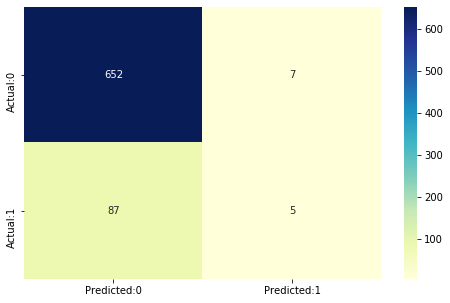

In [32]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [33]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

In [34]:
#Matrics computed from confusion Matrix.

In [35]:
#Computing Overall Clasification Accuracy of Model.
from sklearn.metrics import accuracy_score
print((TP+TN)/float(TP+TN+FP+FN))
print(accuracy_score(y_test,y_pred))

0.8748335552596538
0.8748335552596538


In [36]:
#Compute the overall classification error
#How often classifier is incorrect
print((FP+FN)/float(TP+TN+FP+FN))
print(1-accuracy_score(y_test,y_pred))

0.12516644474034622
0.12516644474034622


In [37]:
#Computing sensitivity
#It's True Positive Rate
from sklearn.metrics import recall_score
print(TP/float(TP+FN))
print(recall_score(y_test,y_pred))

0.05434782608695652
0.05434782608695652


In [38]:
#Computing Specificity
#it's True negative rate.
print(TN/float(TN+FP))

0.9893778452200304


In [39]:
#Computing False Positive Rate
#Actual value is negative
print(FP/float(FP+TN))

0.010622154779969651


In [40]:
#Precision, When value is predicted, how often it is correct.
print(TP/float(TP+FP))

0.4166666666666667


In [41]:
#printing probabilities of first 20 points
logreg.predict(x_test)[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [42]:
y_pred_prob=logreg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.12501637, 0.04383361, 0.21647356, 0.19335715, 0.1071667 ,
       0.11483602, 0.1022553 , 0.10051602, 0.16758404, 0.04339475,
       0.1596792 , 0.12027948, 0.33446183, 0.15309276, 0.25413206,
       0.30464701, 0.31924027, 0.03465137, 0.38704276, 0.13112116,
       0.04673948, 0.45395145, 0.06165554, 0.40299839, 0.32675481,
       0.31239906, 0.20050947, 0.10545476, 0.1156971 , 0.49779046,
       0.28956264, 0.21206911, 0.0354736 , 0.12109938, 0.03985615,
       0.09336841, 0.03279728, 0.0822462 , 0.42423819, 0.08442327,
       0.04212517, 0.04600797, 0.06972697, 0.05325075, 0.04526185,
       0.10019503, 0.10740032, 0.21263413, 0.23594416, 0.25699914,
       0.31982633, 0.02612827, 0.27652725, 0.16002251, 0.09307429,
       0.12254708, 0.02699783, 0.08882196, 0.33840145, 0.17712138,
       0.05465354, 0.1119382 , 0.17527288, 0.35983096, 0.05157732,
       0.05691423, 0.12085863, 0.0992784 , 0.10469428, 0.03816732,
       0.0481335 , 0.23598248, 0.13404382, 0.18515891, 0.02770

In [43]:
y_pred_prob1=logreg.predict_proba(x_test)[:,1]

In [44]:
y_pred_prob1

array([0.12501637, 0.04383361, 0.21647356, 0.19335715, 0.1071667 ,
       0.11483602, 0.1022553 , 0.10051602, 0.16758404, 0.04339475,
       0.1596792 , 0.12027948, 0.33446183, 0.15309276, 0.25413206,
       0.30464701, 0.31924027, 0.03465137, 0.38704276, 0.13112116,
       0.04673948, 0.45395145, 0.06165554, 0.40299839, 0.32675481,
       0.31239906, 0.20050947, 0.10545476, 0.1156971 , 0.49779046,
       0.28956264, 0.21206911, 0.0354736 , 0.12109938, 0.03985615,
       0.09336841, 0.03279728, 0.0822462 , 0.42423819, 0.08442327,
       0.04212517, 0.04600797, 0.06972697, 0.05325075, 0.04526185,
       0.10019503, 0.10740032, 0.21263413, 0.23594416, 0.25699914,
       0.31982633, 0.02612827, 0.27652725, 0.16002251, 0.09307429,
       0.12254708, 0.02699783, 0.08882196, 0.33840145, 0.17712138,
       0.05465354, 0.1119382 , 0.17527288, 0.35983096, 0.05157732,
       0.05691423, 0.12085863, 0.0992784 , 0.10469428, 0.03816732,
       0.0481335 , 0.23598248, 0.13404382, 0.18515891, 0.02770

Text(0, 0.5, 'Frequencies')

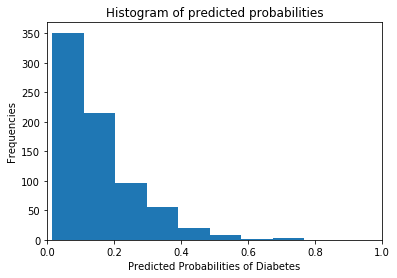

In [45]:
plt.hist(y_pred_prob1,bins=8)
plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted Probabilities of Diabetes")
plt.ylabel("Frequencies")

In [46]:
#ROC Curve

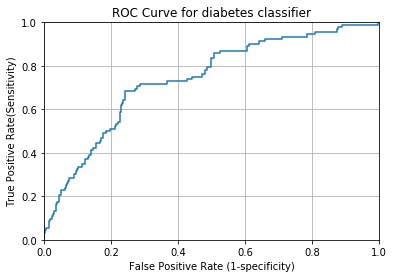

In [47]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC Curve for diabetes classifier")
plt.xlabel("False Positive Rate (1-specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")
plt.grid(True)

In [48]:
#We cant see the actual value of threshold on ROC curve, 
#difining fuction to do so.
def evaluate_threshold(threshold):
    print ('Sensitivity:',tpr[thresholds>threshold][-1])
    print ('Specificity:',1-fpr[thresholds>threshold][-1])
    

In [49]:
evaluate_threshold(0.5)

Sensitivity: 0.05434782608695652
Specificity: 0.9939301972685888


In [50]:
#Checking AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_prob))

0.7385696377911195
